In [1]:
import rosbag
import rospy
import sensor_msgs.point_cloud2 as pc2
from matplotlib import pyplot as plt

In [2]:
source_file="../../Raw_Point_Cloud.bag"
topic=['/cloud_map']
bag_in=rosbag.Bag(source_file)

In [3]:
bag_in.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'sensor_msgs/PointCloud2': '1158d486dd51d683ce2f1be655c3c181'}, topics={'/cloud_map': TopicTuple(msg_type='sensor_msgs/PointCloud2', message_count=198, connections=1, frequency=0.9660762297288987)})

In [4]:
msgGen=bag_in.read_messages(topics=topic)

In [6]:
msg1=next(msgGen)

In [7]:
type(msg1)

rosbag.bag.BagMessage

In [13]:
point_cloud_msg=msg1.message

In [34]:
point_cloud_msg.header
point_cloud_msg.fields

[name: "x"
 offset: 0
 datatype: 7
 count: 1,
 name: "y"
 offset: 4
 datatype: 7
 count: 1,
 name: "z"
 offset: 8
 datatype: 7
 count: 1,
 name: "rgb"
 offset: 16
 datatype: 7
 count: 1]

In [16]:
cloud=pc2.read_points(point_cloud_msg,field_names=["x","y","z"])

In [18]:
allPoints=list(cloud)

In [19]:
len(allPoints)

6642

In [21]:
import numpy as np

In [22]:
allPoints=np.array(allPoints)

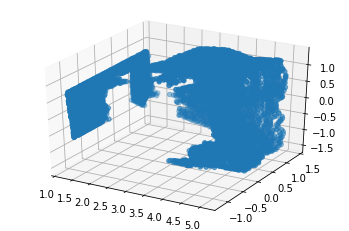

In [30]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection="3d")
ax.scatter(allPoints[:,0],allPoints[:,1],allPoints[:,2])

In [31]:
colors=pc2.read_points(point_cloud_msg,field_names=["rgb"])

In [58]:
firstColorOrigin=next(colors)

In [60]:
s = struct.pack('>f' ,firstColorOrigin[0])

In [70]:
s

b'\xff"" '

In [71]:
struct.unpack("ii",s)

error: unpack requires a buffer of 8 bytes

In [62]:
i = struct.unpack('>l',s)[0]

In [74]:
import ctypes
pack = ctypes.c_uint32(i).value
hex(pack)

'0xff222220'

In [76]:
# Question: How to unpack color data
r = int((pack & 0x00FF0000)>> 16)
g = int((pack & 0x0000FF00)>> 8)
b = int((pack & 0x000000FF))
print(r,g,b)

34 34 32


In [41]:
type(firstColor[0])

float

In [51]:
firstColor=np.array(firstColor).astype("uint") # Convert to unsigned type to extract rgb data

In [57]:
hex(firstColor[0])

'0x8000000000000000'

In [37]:
import struct

In [54]:
struct.unpack("iii",firstColor[0])

error: unpack requires a buffer of 12 bytes

In [ ]:
rgb=struct.unpack("I",struct.pack("BBB",b,g,r))

In [ ]:
import ctypes
ctypes.c_ulong
ctypes.c_ulong(firstColor[0]) & 0xff